In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_fscore_support,classification_report,accuracy_score,precision_score, recall_score, f1_score
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

KNN algorithm for detecting diabites using 10% of The Behavioral Risk Factor Surveillance System data

In [2]:
data=pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')
X = data.drop("Diabetes_binary", axis=1)
y = data["Diabetes_binary"] 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
fraction_to_keep = 0.1  
X_sampled, _, y_sampled, _ = train_test_split(X_scaled, y, test_size=1-fraction_to_keep, stratify=y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.3, stratify=y_sampled, random_state=42)
neighbors_list = list(range(1, 10)) 

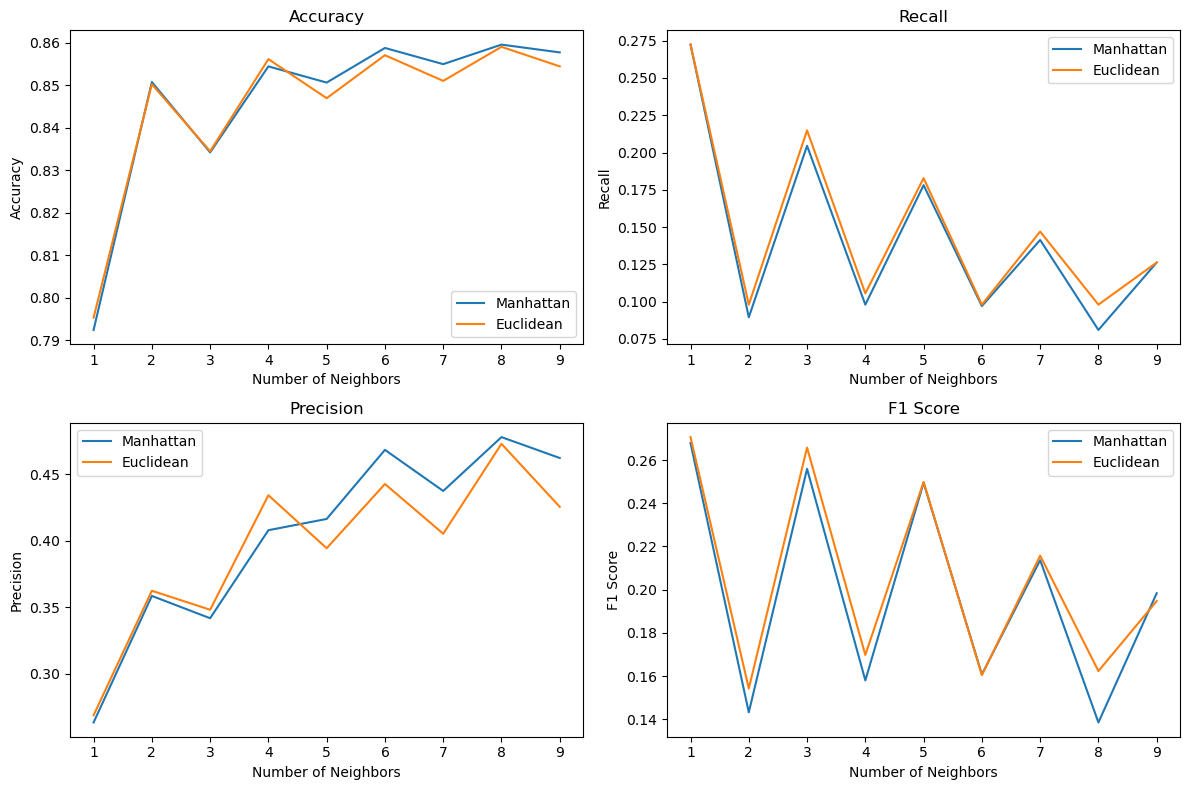

In [3]:
accuracy_scores_manhattan = []
recall_scores_manhattan = []
precision_scores_manhattan = []
f1_scores_manhattan = []

accuracy_scores_euclidean = []
recall_scores_euclidean = []
precision_scores_euclidean = []
f1_scores_euclidean = []

for n in neighbors_list:
    knn_manhattan = KNeighborsClassifier(n_neighbors=n, metric='manhattan') 
    knn_euclidean = KNeighborsClassifier(n_neighbors=n, p=2)  
    
    knn_manhattan.fit(X_train, y_train)
    knn_euclidean.fit(X_train, y_train)

    y_pred_manhattan = knn_manhattan.predict(X_test)
    y_pred_euclidean = knn_euclidean.predict(X_test)

    accuracy_scores_manhattan.append(accuracy_score(y_test, y_pred_manhattan))
    recall_scores_manhattan.append(recall_score(y_test, y_pred_manhattan))
    precision_scores_manhattan.append(precision_score(y_test, y_pred_manhattan))
    f1_scores_manhattan.append(f1_score(y_test, y_pred_manhattan))
    
    accuracy_scores_euclidean.append(accuracy_score(y_test, y_pred_euclidean))
    recall_scores_euclidean.append(recall_score(y_test, y_pred_euclidean))
    precision_scores_euclidean.append(precision_score(y_test, y_pred_euclidean))
    f1_scores_euclidean.append(f1_score(y_test, y_pred_euclidean))

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(neighbors_list, accuracy_scores_manhattan, label='Manhattan')
plt.plot(neighbors_list, accuracy_scores_euclidean, label='Euclidean')
plt.title('Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(neighbors_list, recall_scores_manhattan, label='Manhattan')
plt.plot(neighbors_list, recall_scores_euclidean, label='Euclidean')
plt.title('Recall')
plt.xlabel('Number of Neighbors')
plt.ylabel('Recall')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(neighbors_list, precision_scores_manhattan, label='Manhattan')
plt.plot(neighbors_list, precision_scores_euclidean, label='Euclidean')
plt.title('Precision')
plt.xlabel('Number of Neighbors')
plt.ylabel('Precision')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(neighbors_list, f1_scores_manhattan, label='Manhattan')
plt.plot(neighbors_list, f1_scores_euclidean, label='Euclidean')
plt.title('F1 Score')
plt.xlabel('Number of Neighbors')
plt.ylabel('F1 Score')
plt.legend()

plt.tight_layout()
plt.show()


KNN algorithm for detecting diabites using 10% of The Behavioral Risk Factor Surveillance System data enriched with synthetic data created using SMOTE

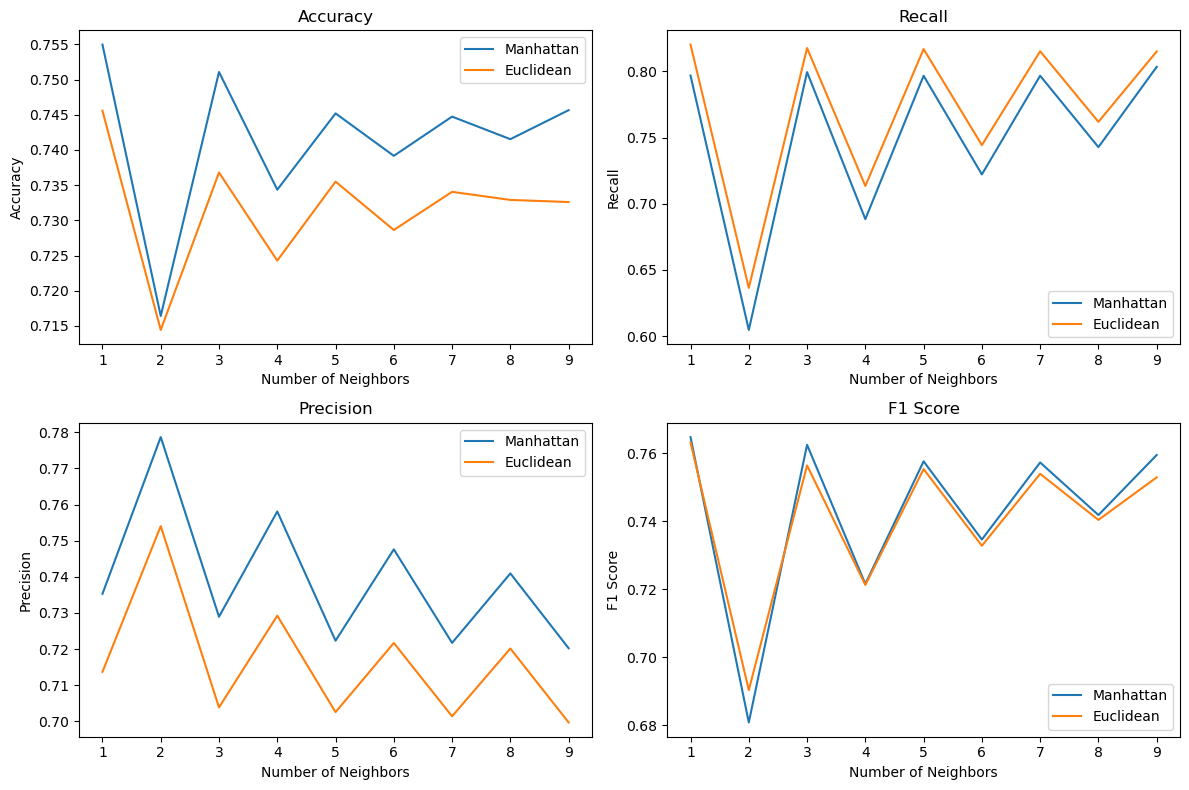

In [4]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)
fraction_to_keep = 0.1  
X_sampled, _, y_sampled, _ = train_test_split(X_resampled, y_resampled, test_size=1-fraction_to_keep, stratify=y_resampled, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.3, stratify=y_sampled, random_state=42)

accuracy_scores_manhattan = []
recall_scores_manhattan = []
precision_scores_manhattan = []
f1_scores_manhattan = []

accuracy_scores_euclidean = []
recall_scores_euclidean = []
precision_scores_euclidean = []
f1_scores_euclidean = []

for n in neighbors_list:
    knn_manhattan = KNeighborsClassifier(n_neighbors=n, metric='manhattan') 
    knn_euclidean = KNeighborsClassifier(n_neighbors=n, p=2)  
    
    knn_manhattan.fit(X_train, y_train)
    knn_euclidean.fit(X_train, y_train)

    y_pred_manhattan = knn_manhattan.predict(X_test)
    y_pred_euclidean = knn_euclidean.predict(X_test)

    accuracy_scores_manhattan.append(accuracy_score(y_test, y_pred_manhattan))
    recall_scores_manhattan.append(recall_score(y_test, y_pred_manhattan))
    precision_scores_manhattan.append(precision_score(y_test, y_pred_manhattan))
    f1_scores_manhattan.append(f1_score(y_test, y_pred_manhattan))
    
    accuracy_scores_euclidean.append(accuracy_score(y_test, y_pred_euclidean))
    recall_scores_euclidean.append(recall_score(y_test, y_pred_euclidean))
    precision_scores_euclidean.append(precision_score(y_test, y_pred_euclidean))
    f1_scores_euclidean.append(f1_score(y_test, y_pred_euclidean))

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(neighbors_list, accuracy_scores_manhattan, label='Manhattan')
plt.plot(neighbors_list, accuracy_scores_euclidean, label='Euclidean')
plt.title('Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(neighbors_list, recall_scores_manhattan, label='Manhattan')
plt.plot(neighbors_list, recall_scores_euclidean, label='Euclidean')
plt.title('Recall')
plt.xlabel('Number of Neighbors')
plt.ylabel('Recall')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(neighbors_list, precision_scores_manhattan, label='Manhattan')
plt.plot(neighbors_list, precision_scores_euclidean, label='Euclidean')
plt.title('Precision')
plt.xlabel('Number of Neighbors')
plt.ylabel('Precision')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(neighbors_list, f1_scores_manhattan, label='Manhattan')
plt.plot(neighbors_list, f1_scores_euclidean, label='Euclidean')
plt.title('F1 Score')
plt.xlabel('Number of Neighbors')
plt.ylabel('F1 Score')
plt.legend()

plt.tight_layout()
plt.show()
